# Regressão Logística

Essa técnica estatística tem como objetivo a predição de valores a partir de uma variável categórica, binária, e de outras variáveis explicativas contínuas ou binárias.

Também conhecida como modelo logístico, modelo logit, e classificador de máxima entropia é muito usada em ciências médicas e ciências sociais para:

- Medicina, permite determinar os fatores que caracterizam um grupo de indivíduos doentes em relação a indivíduos sãos.
- Seguros, permite encontrar fracções da clientela que sejam sensíveis a determinada política securitária em relação a um dado risco particular.
- Instituições financeiras, pode detectar os grupos de risco para a subscrição de um crédito.
- Econometria, permite explicar uma variável discreta, como por exemplo as intenções de voto em atos eleitorais.

Existem uma série de ferramentas que ajudam a interpretar os resultados e por ter como resposta uma variável categórica, pode-se comparar seus resultados com outras técnicas preditivas como árvores de decisão, redes neurais etc.


### Exemplo

Analisando as correlações parciais e os impactos causais em variaveis dependentes binárias.

Cerca de um em cada sete adultos dos EUA tem diabetes agora, de acordo com os Centros para Controle e Prevenção de Doenças. Mas até 2050, essa taxa pode disparar para até um em três. Com isto em mente: Aprender a usar o Aprendizado de Máquina para ajudar a prever o Diabetes. 

Dataset 1: Diabetes
    1. preg = Number of times pregnant
    2. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    3. pres = Diastolic blood pressure (mm Hg)
    4. skin = Triceps skin fold thickness (mm)
    5. insu = 2-Hour serum insulin (mu U/ml)
    6. mass = Body mass index (weight in kg/(height in m)^2)
    7. pedi = Diabetes pedigree function
    8. age = Age (years)
    9. class = Class variable (0 or 1)

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd  
import statsmodels.api as sm  
import numpy as np  
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, push_notebook, show
from ipywidgets import interact
import scipy.special
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
import numpy as np
from bokeh.plotting import figure
from bokeh.io import show

output_notebook()

Loading BokehJS ...

# Importando o dataset

In [2]:
df = pd.read_csv('./dados/diabetes.csv.zip')  

In [3]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


# Analisando os dados

In [4]:
df.shape

(768, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insu,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [6]:
df.corr().round(2)

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54
plas,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26
pres,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24
skin,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11
insu,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04
mass,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04
pedi,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03
age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00


In [7]:
df['class'].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

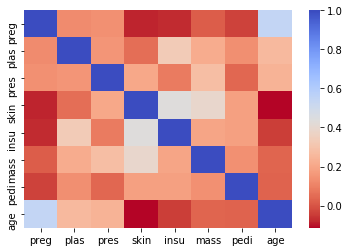

In [8]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

# Identificando a correlação de teste positivo com as demais variáveis

In [9]:
df['class'].unique()

array(['tested_positive', 'tested_negative'], dtype=object)

In [10]:
df['y'] = df['class'] == 'tested_positive'

In [11]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class,y
0,6,148,72,35,0,33.6,0.627,50,tested_positive,True
1,1,85,66,29,0,26.6,0.351,31,tested_negative,False
2,8,183,64,0,0,23.3,0.672,32,tested_positive,True
3,1,89,66,23,94,28.1,0.167,21,tested_negative,False
4,0,137,40,35,168,43.1,2.288,33,tested_positive,True


In [12]:
df.corr().round(2)['y']

preg    0.22
plas    0.47
pres    0.07
skin    0.07
insu    0.13
mass    0.29
pedi    0.17
age     0.24
y       1.00
Name: y, dtype: float64

# Plotando

## 1 - Plotando os testes por cores, buscando uma relação nos resultados entre Idade x IMC

In [13]:
colormap = {'tested_positive': 'red', 'tested_negative': 'blue'}
colors = [colormap[x] for x in df['class']]

In [14]:
p = figure(title = "Diabetes")
p.xaxis.axis_label = 'Age'
p.yaxis.axis_label = 'IMC'

p.circle(df["age"], df["mass"],
         color=colors, fill_alpha=0.3, size=7)

show(p)

## 2 - Dispersão com reta de tendência, Nível de Gordura da Pele x Insulina

In [15]:
x=df['skin']
y=df['insu']

best_fit_line = np.polyfit(x, y, 1, full=True)
slope=best_fit_line[0][0]
intercept=best_fit_line[0][1]
y_predicted = [slope*i + intercept  for i in x]

fig=figure()
fig.circle(x,y)
fig.line(x,y_predicted,color='red',legend='y='+str(round(slope,2))+'x+'+str(round(intercept,2)))
show(fig)

## 3 - Dispersão da concentração de glicose

In [16]:
x=df['plas']   #  2. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
y=df['y']      # y são todos os casos positivos para diabetes no dataset

fig=figure()
fig.circle(x,y)
show(fig)

In [17]:
par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]

fig=figure()
fig.circle(x,y)
fig.line(x,y_predicted,color='red',legend='y='+str(round(slope,2))+'x+'+str(round(intercept,2)))
show(fig)

# Regressão Linear OLS, concentração de Glicose x Casos Positivos

In [18]:
df['y'] = df['y'].astype(int)

In [20]:
function1 = 'y ~ plas'

model1 = smf.ols(function1, df).fit()
print(model1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.217   
Dependent Variable: y                AIC:                856.7703
Date:               2019-06-15 18:53 BIC:                866.0579
No. Observations:   768              Log-Likelihood:     -426.39 
Df Model:           1                F-statistic:        213.2   
Df Residuals:       766              Prob (F-statistic): 8.94e-43
R-squared:          0.218            Scale:              0.17819 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.4925    0.0596  -8.2616  0.0000  -0.6095  -0.3755
plas           0.0070    0.0005  14.6001  0.0000   0.0060   0.0079
-----------------------------------------------------------------
Omnibus:              62.933       Durbin-Watson:          1.997 
Prob(Omnibus):        

# Regressão Linear OLS com todas as variáveis

In [21]:
list(df)

['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class', 'y']

In [22]:
function1 = 'y ~ preg + plas + pres + skin + insu + mass + pedi + age'

model1 = smf.ols(function1, df).fit()
print(model1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.296   
Dependent Variable: y                AIC:                781.8218
Date:               2019-06-15 18:55 BIC:                823.6159
No. Observations:   768              Log-Likelihood:     -381.91 
Df Model:           8                F-statistic:        41.29   
Df Residuals:       759              Prob (F-statistic): 7.36e-55
R-squared:          0.303            Scale:              0.16017 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.8539    0.0855  -9.9888  0.0000  -1.0217  -0.6861
preg           0.0206    0.0051   4.0140  0.0001   0.0105   0.0307
plas           0.0059    0.0005  11.4929  0.0000   0.0049   0.0069
pres          -0.0023    0.0008  -2.8730  0.0042  -0.0039  -0.0007
skin           0.000

# Regressão Logística

In [23]:
logit = smf.logit(function1, df).fit()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [24]:
print(logit.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.272     
Dependent Variable: y                AIC:              741.4454  
Date:               2019-06-15 18:56 BIC:              783.2395  
No. Observations:   768              Log-Likelihood:   -361.72   
Df Model:           8                LL-Null:          -496.74   
Df Residuals:       759              LLR p-value:      9.6516e-54
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -8.4047    0.7166  -11.7280  0.0000  -9.8093  -7.0001
preg          0.1232    0.0321    3.8401  0.0001   0.0603   0.1861
plas          0.0352    0.0037    9.4814  0.0000   0.0279   0.0424
pres         -0.0133    0.0052

In [31]:
logit.predict()

array([0.72172655, 0.04864161, 0.79670208, 0.04162486, 0.9021839 ,
       0.14663156, 0.06657752, 0.64456958, 0.70935795, 0.03633584,
       0.2196353 , 0.89775311, 0.78443019, 0.6285978 , 0.62755692,
       0.40089326, 0.37117816, 0.19661133, 0.35750465, 0.23419965,
       0.39243613, 0.3166388 , 0.94042369, 0.29474641, 0.70199727,
       0.44128257, 0.7374353 , 0.04577287, 0.53899926, 0.27778614,
       0.42566271, 0.57341623, 0.04901545, 0.03645095, 0.43242084,
       0.14935439, 0.66550024, 0.39335387, 0.1724685 , 0.57216884,
       0.74422212, 0.69667308, 0.11354068, 0.92690571, 0.62905035,
       0.95256495, 0.43443939, 0.03980806, 0.38110328, 0.03897446,
       0.03616579, 0.08518856, 0.06734105, 0.82681715, 0.70864808,
       0.02267903, 0.88312809, 0.35799557, 0.83333664, 0.18331603,
       0.0099027 , 0.5216136 , 0.02335581, 0.30854273, 0.35417978,
       0.11860285, 0.19234284, 0.47082253, 0.03197972, 0.30191738,
       0.193508  , 0.36433292, 0.81746444, 0.24604527, 0.05164

# Plotando a distribuição da predição

In [32]:
df['yhat'] = logit.predict()

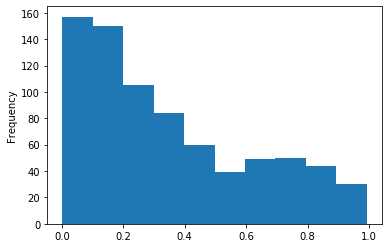

In [33]:
df['yhat'].plot.hist()

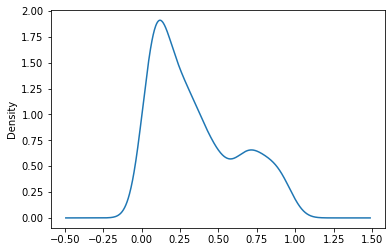

In [34]:
df['yhat'].plot.kde()

# Probabilidade condicional

In [35]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class,y,yhat
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1,0.721727
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0,0.048642
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1,0.796702
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0,0.041625
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1,0.902184


In [36]:
df['yresult'] = 0

threshold = 0.5

for (i, p) in enumerate(df['yhat']):
    if p > threshold:
        df['yresult'][i] = 1 

C:\Users\Marcos\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [37]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class,y,yhat,yresult
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1,0.721727,1
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0,0.048642,0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1,0.796702,1
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0,0.041625,0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1,0.902184,1


In [38]:
df['yresult'].value_counts()

0    557
1    211
Name: yresult, dtype: int64

In [39]:
df['class'].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

# Matriz de confusão

In [40]:
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

result_matrix = confusion_matrix(df.y, df.yresult)
result_matrix

array([[445,  55],
       [112, 156]], dtype=int64)

In [41]:
tn, fp, fn, tp = confusion_matrix(df.y, df.yresult).ravel()

### 1 - Cálculo da Precisão

In [42]:
precision = tp / (tp+fp)
precision

0.7393364928909952

### 2 - Cálculo da Sensibilidade

In [43]:
recall = tp / (tp+fn)
recall

0.582089552238806

# Alterando o limite da condição

__Mais precisão:__

In [45]:
df['yresult'] = 0

threshold = 0.73

for (i, p) in enumerate(df['yhat']):
    if p > threshold:
        df['yresult'][i] = 1 

In [46]:
df['yresult'].value_counts()

0    664
1    104
Name: yresult, dtype: int64

In [47]:
result_matrix = confusion_matrix(df.y, df.yresult)
result_matrix

array([[482,  18],
       [182,  86]], dtype=int64)

In [48]:
tn, fp, fn, tp = confusion_matrix(df.y, df.yresult).ravel()

__Cálculo da Precisão:__

In [49]:
precision = tp / (tp+fp)
precision

0.8269230769230769

__Cálculo da Sensibilidae:__

In [50]:
recall = tp / (tp+fn)
recall

0.3208955223880597

### Obviamente, ao aumentar a precisão, a sensbilidade ficou bem mais baixa.